Initial Test of the Scikit-learn GridSearch for GMM
---

In [54]:
# Author: Thiago Akio Nakamura
# E-mail: akionakas@gmail.com

# Import necessary classes and libraries
%matplotlib inline
import numpy
import matplotlib.pyplot
import time
import matplotlib as mpl

from scipy import linalg
from sklearn.datasets import make_blobs
from sklearn.mixture import GMM
from scipy.stats import randint as sp_randint

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cross_validation import train_test_split
from matplotlib.colors import LogNorm
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

Creating the Data
---
The first step is to generate the simulated data-set.

Created 7500 training samples.
Created 2500 validation samples.


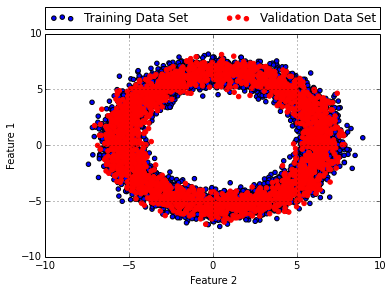

In [55]:
# Create the data
N = 10000 # number of data points
train_perct = 0.8
t = numpy.linspace(0, 4*numpy.pi, N)
feature1 = 6.0*numpy.sin(8*t+0.001) + 0.5 + 0.6*numpy.random.randn(N) # create artificial data with noise
feature2 = 6.0*numpy.cos(8*t+0.001) + 0.5 + 0.6*numpy.random.randn(N) # create artificial data with noise
X = numpy.vstack((feature1, feature2)).T
y = numpy.ones(N)

X_train, X_val, t_train, t_val, y_train, y_val= train_test_split(X, t, y, test_size=0.25, random_state=0)

print 'Created {} training samples.'.format(len(t_train))
print 'Created {} validation samples.'.format(len(t_val))
matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(X_train[:, 0], X_train[:, 1])
matplotlib.pyplot.scatter(X_val[:, 0], X_val[:, 1], color='red')
matplotlib.pyplot.legend(['Training Data Set', 'Validation Data Set'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
matplotlib.pyplot.title('Data set')
matplotlib.pyplot.ylabel('Feature 1')
matplotlib.pyplot.xlabel('Feature 2')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

Create the parameters space of the search
---

In [56]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_components': [1, 2, 3, 4, 5, 6, 7, 8],
                     'covariance_type': ['spherical', 'tied', 'diag', 'full'],
                     'verbose' : [1]}]

Run the grid search:

In [57]:
print("# Tuning hyper-parameters")
print()

def myScore(model, X, y):
    scores = model.score(X)
    return numpy.sum(scores)

clf = GridSearchCV(GMM(), tuned_parameters, cv=5,
                       n_jobs=1, scoring=GMM.bic)
clf.fit(X_train)


# Tuning hyper-parameters
()
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
		EM algorithm converged.
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
		EM algorithm converged.
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
		EM algorithm converged.
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
		EM algorithm converged.
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
		EM algorithm converged.
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
	EM iteration 4
	EM iteration 5
	EM iteration 6
	EM iteration 7
		EM algorithm converged.
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM 

GridSearchCV(cv=5, error_score='raise',
       estimator=GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=1, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'verbose': [1], 'n_components': [1, 2, 3, 4, 5, 6, 7, 8], 'covariance_type': ['spherical', 'tied', 'diag', 'full']}],
       pre_dispatch='2*n_jobs', refit=True,
       scoring=<unbound method GMM.bic>, verbose=0)

In [58]:
print clf.best_estimator_
print clf.best_params_

GMM(covariance_type='spherical', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=1)
{'verbose': 1, 'covariance_type': 'spherical', 'n_components': 2}


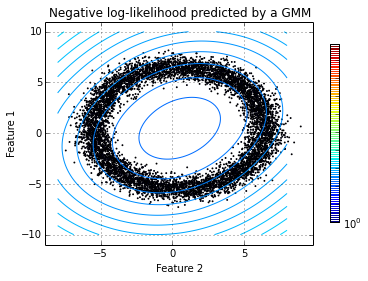

[[ 2.22787657  2.63349395]
 [-1.20629304 -1.66256397]]


In [59]:
# Display predicted scores by the model as a contour plot
best_model = clf.best_estimator_
x = numpy.linspace(-8.0, 8.0, 100)
y = numpy.linspace(-10.0, 10.0, 100)
X, Y = numpy.meshgrid(x, y)
XX = numpy.array([X.ravel(), Y.ravel()]).T
Z = -best_model.score_samples(XX)[0]
Z = Z.reshape(X.shape)

CS = matplotlib.pyplot.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=numpy.logspace(0, 3, 100))
CB = matplotlib.pyplot.colorbar(CS, shrink=0.8, extend='both')
ae = matplotlib.pyplot.scatter(X_train[:, 0], X_train[:, 1], .8)
matplotlib.pyplot.title('Negative log-likelihood predicted by a GMM')
matplotlib.pyplot.axis('tight')
matplotlib.pyplot.ylabel('Feature 1')
matplotlib.pyplot.xlabel('Feature 2')
matplotlib.pyplot.grid()        
matplotlib.pyplot.show()
print best_model.means_

In [60]:
clf.grid_scores_

[mean: 17269.48114, std: 14.08410, params: {'verbose': 1, 'covariance_type': 'spherical', 'n_components': 1},
 mean: 17307.82254, std: 13.21254, params: {'verbose': 1, 'covariance_type': 'spherical', 'n_components': 2},
 mean: 16945.11320, std: 23.72040, params: {'verbose': 1, 'covariance_type': 'spherical', 'n_components': 3},
 mean: 16386.38501, std: 44.30311, params: {'verbose': 1, 'covariance_type': 'spherical', 'n_components': 4},
 mean: 15990.12659, std: 39.46285, params: {'verbose': 1, 'covariance_type': 'spherical', 'n_components': 5},
 mean: 15553.57145, std: 17.90681, params: {'verbose': 1, 'covariance_type': 'spherical', 'n_components': 6},
 mean: 15250.39457, std: 16.27753, params: {'verbose': 1, 'covariance_type': 'spherical', 'n_components': 7},
 mean: 15008.86045, std: 20.02056, params: {'verbose': 1, 'covariance_type': 'spherical', 'n_components': 8},
 mean: 17284.23560, std: 13.92280, params: {'verbose': 1, 'covariance_type': 'tied', 'n_components': 1},
 mean: 16820.69

Using Random Search 
---

In [61]:
# run randomized search
n_iter_search = 10
# specify parameters and distributions to sample from
param_dist = {"n_components": sp_randint(1, 8),
              "covariance_type": ['spherical', 'tied', 'diag', 'full'],
              "verbose": [1]}

random_search = RandomizedSearchCV(GMM(), param_distributions=param_dist,
                                   n_iter=n_iter_search, scoring=GMM.bic)

random_search.fit(X_train)


Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
	EM iteration 4
	EM iteration 5
	EM iteration 6
	EM iteration 7
		EM algorithm converged.
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
	EM iteration 4
	EM iteration 5
	EM iteration 6
	EM iteration 7
		EM algorithm converged.
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
	EM iteration 4
	EM iteration 5
	EM iteration 6
	EM iteration 7
		EM algorithm converged.
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
	EM iteration 4
	EM iteration 5
	EM iteration 6
	EM iteration 7
		EM algorithm converged.
Expectation-maximization algorithm started.
Initialization 1
	EM iteration 1
	EM iteration 2
	EM iteration 3
	EM iteration 4
	EM iteration 5
	EM iteration 6
	EM iteration 7
		EM algorithm converged.
Expec

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=1, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'verbose': [1], 'n_components': <scipy.stats.distributions.rv_frozen object at 0x10d844e50>, 'covariance_type': ['spherical', 'tied', 'diag', 'full']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=<unbound method GMM.bic>, verbose=0)

In [62]:
random_search.best_estimator_
print random_search.best_estimator_.means_

[[ 0.51931528  0.49612769]]
